# Solvers
### Optimization methods to find inverse of a function
* division is inverse of multiplication
* Log is inverse of exponential
### Finance examples: 
* Computing implied Vol give Black Scholes option price
* Yield to maturity of a bond
* Discount factor when bootstrapping a swap curve

### It is often difficult to solve an inverse function analytically.

Goal is to find value of input variables that give a desired value of output variable.
If $y = f(x) $ find value of x for a given value of y. 
lets say $ f(x) = x^2 + x $ and we want to find value of x when function value is 6 
We do this all the time when we find roots of a polynomial
$X^2 + x -6 = 0$ values of x that satisfy this equation are $x = +2$ or $x = -3$


### Goal is to find value of x where function results in value V.
### We can subtract V from the function and then find value of x where function intersects x axis (or y value is zero)
### Bisection method
* Requires two end points within which the root of the function is expected to lie
* This method starts with a wide space and iteratively divides the search space in half, and correctly identifies the half space 
 which contains the root
* Given [a, b] as two end points, first make sure that f(a) * f(b) < 0
* Compute c as (a+b)/2, then choose region [a, c] if f(a) * f(c) < 0 else choose [c, b] if f(c) * f(b) < 0

In [2]:
# imports
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [3]:
optimize.bisect?


In [4]:
# Create a class to house objective function. It also serves to collect optimization statistics
class EquationSolver:

    def __init__(self, target):
        self.numiter=0
        self.error = []
        self.target = target
        
    def objectiveFunction(self, x):
        self.numiter += 1
        self.error.append(x*x + x -self.target)
        return x*x + x - self.target
    
    def derivative(self, x):
        return 2*x + 1


In [ ]:
target = 6
eqSolver = EquationSolver(target)

try:
    root = optimize.bisect(eqSolver.objectiveFunction, 0, 10, xtol=1e-9, rtol=1e-10, maxiter=100, full_output=True)
    print(root)
    print('%.5f is value of x where f(x) = %.2d, it was found in %d iterations' % (root[0], target, eqSolver.numiter))
    x = np.arange(len(eqSolver.error))
    plt.plot(x, eqSolver.error, '-')
    plt.title('Bisection Method: Error')
    plt.xlabel('Iteration')
except ValueError as err:
    print (err)

## Secant Method
* Given a guess, calculate slope of the function at x=guess
* Draw the line with the calculated slope and guess point
* Next guess is where the line intersects x-axis
* Keep iterating till you have reached the desired tolerance.

$$x_{n+1} = x_{n} -\dfrac{x_n - x_{n-1}}{f(x_n)-f(x_{n-1})}f(x_n) $$

2.00000 is value of x where f(x) = 06, it was found in 8 iterations
8


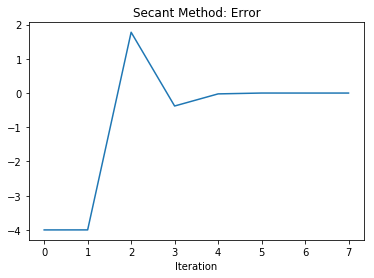

In [6]:


from scipy import optimize
target = 6
eqSolver = EquationSolver(target)
try:
    root = optimize.newton(eqSolver.objectiveFunction, 1, tol=1e-9, maxiter=100)
    print('%.5f is value of x where f(x) = %.2d, it was found in %d iterations' % (root, target, eqSolver.numiter))
    print(len(eqSolver.error))
    x = np.arange(len(eqSolver.error))
    plt.plot(x, eqSolver.error, '-')
    plt.title('Secant Method: Error')
    plt.xlabel('Iteration')
except ValueError as err:
    print (err)

## Newton Raphson
* Newton Raphson method also commonly known as Newton's method
* Use this method If the first derivative analytically computable and is easy to compute.
* This method is functionally similar to Secant, just that it uses first derivative instead of finite difference approximation

$$ x_{i+1} = x_{i} - \dfrac{f(x_i)}{f^{\prime}(x_i)}$$

In [6]:
optimize.newton?


2.00000 is value of x where f(x) = 06, it was found in 6 iterations
6


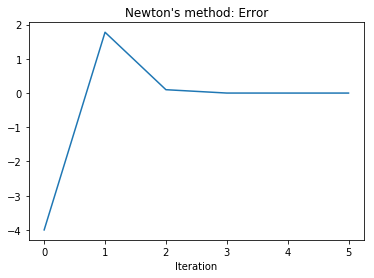

In [7]:

target = 6
eqSolver = EquationSolver(target)
try:
    root = optimize.newton(eqSolver.objectiveFunction, 1, fprime=eqSolver.derivative, tol=1e-9, maxiter=100)
    print('%.5f is value of x where f(x) = %.2d, it was found in %d iterations' % (root, target, eqSolver.numiter))
    print(len(eqSolver.error))
    x = np.arange(len(eqSolver.error))
    plt.plot(x, eqSolver.error, '-')
    plt.title("Newton's method: Error")
    plt.xlabel("Iteration")
except ValueError as err:
    print (err)

## Brent method
* It combines Bisection and Secant/Newton
* If Secant/Newton guess is outside of range, use bisection otherwise use Secant


2.00000 is value of x where f(x) = 06, it was found in 11 iterations
11


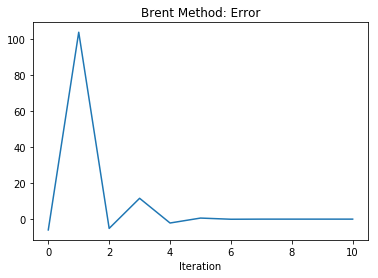

In [8]:

target = 6
eqSolver = EquationSolver(target)
try:
    root = optimize.brentq(eqSolver.objectiveFunction, 0, 10, xtol=1e-9, rtol=1e-10, maxiter=100, full_output=True)
    print('%.5f is value of x where f(x) = %.2d, it was found in %d iterations' % (root[0], target, eqSolver.numiter))
    print(len(eqSolver.error))
    x = np.arange(len(eqSolver.error))
    plt.plot(x, eqSolver.error, '-')
    plt.title('Brent Method: Error')
    plt.xlabel('Iteration')

except ValueError as err:
    print (err)